# Crystal System Classification

## Data Loading

In [1]:
# Importing dataset via kaggle

!kaggle datasets download -d divyansh22/crystal-system-properties-for-liion-batteries

Dataset URL: https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries
License(s): CC0-1.0
  0%|                                               | 0.00/8.05k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 8.05k/8.05k [00:00<00:00, 27.3MB/s]


In [2]:
# Exporting dataset from zipfile

import zipfile
zip_ref = zipfile.ZipFile('/home/bhxveshhh/ML/Crystal System Classification/crystal-system-properties-for-liion-batteries.zip', 'r')
zip_ref.extractall('/home/bhxveshhh/ML/Crystal System Classification')
zip_ref.close()

## Exploratory Data Analysis

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("lithium-ion batteries.csv")

In [5]:
df.head()

,Materials Id,Formula,Spacegroup,Formation Energy (eV),E Above Hull (eV),Band Gap (eV),Nsites,Density (gm/cc),Volume,Has Bandstructure,Crystal System
0,mp-849394,Li2MnSiO4,Pc,-2.699,0.006,3.462,16,2.993,178.513,True,monoclinic
1,mp-783909,Li2MnSiO4,P21/c,-2.696,0.008,2.879,32,2.926,365.272,True,monoclinic
2,mp-761311,Li4MnSi2O7,Cc,-2.775,0.012,3.653,28,2.761,301.775,True,monoclinic
3,mp-761598,Li4Mn2Si3O10,C2/c,-2.783,0.013,3.015,38,2.908,436.183,True,monoclinic
4,mp-767709,Li2Mn3Si3O10,C2/c,-2.747,0.016,2.578,36,3.334,421.286,True,monoclinic


In [6]:
df.shape

(339, 11)

In [7]:
df.size

3729

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Materials Id           339 non-null    object 
 1   Formula                339 non-null    object 
 2   Spacegroup             339 non-null    object 
 3   Formation Energy (eV)  339 non-null    float64
 4   E Above Hull (eV)      339 non-null    float64
 5   Band Gap (eV)          339 non-null    float64
 6   Nsites                 339 non-null    int64  
 7   Density (gm/cc)        339 non-null    float64
 8   Volume                 339 non-null    float64
 9   Has Bandstructure      339 non-null    bool   
 10  Crystal System         339 non-null    object 
dtypes: bool(1), float64(5), int64(1), object(4)
memory usage: 26.9+ KB


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Formation Energy (eV),339.0,-2.616950,0.183809,-2.985,-2.7575,-2.605,-2.5255,-2.012
E Above Hull (eV),339.0,0.058215,0.030363,0.000,0.0355,0.062,0.0815,0.190
Band Gap (eV),339.0,2.079740,1.087968,0.000,1.2655,2.499,2.9680,3.823
Nsites,339.0,38.837758,23.133142,10.000,26.0000,31.000,52.0000,132.000
Density (gm/cc),339.0,2.984003,0.353968,2.200,2.7605,2.947,3.1060,4.201
Volume,339.0,467.765619,292.674559,122.581,286.3815,358.537,601.6965,1518.850


In [10]:
df.isnull().sum()

Materials Id             0
Formula                  0
Spacegroup               0
Formation Energy (eV)    0
E Above Hull (eV)        0
Band Gap (eV)            0
Nsites                   0
Density (gm/cc)          0
Volume                   0
Has Bandstructure        0
Crystal System           0
dtype: int64

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.nunique()

Materials Id             339
Formula                  114
Spacegroup                44
Formation Energy (eV)    251
E Above Hull (eV)        108
Band Gap (eV)            307
Nsites                    49
Density (gm/cc)          300
Volume                   339
Has Bandstructure          2
Crystal System             3
dtype: int64

In [13]:
df['Crystal System'].value_counts()

Crystal System
monoclinic      139
orthorhombic    128
triclinic        72
Name: count, dtype: int64

## Data Visualization

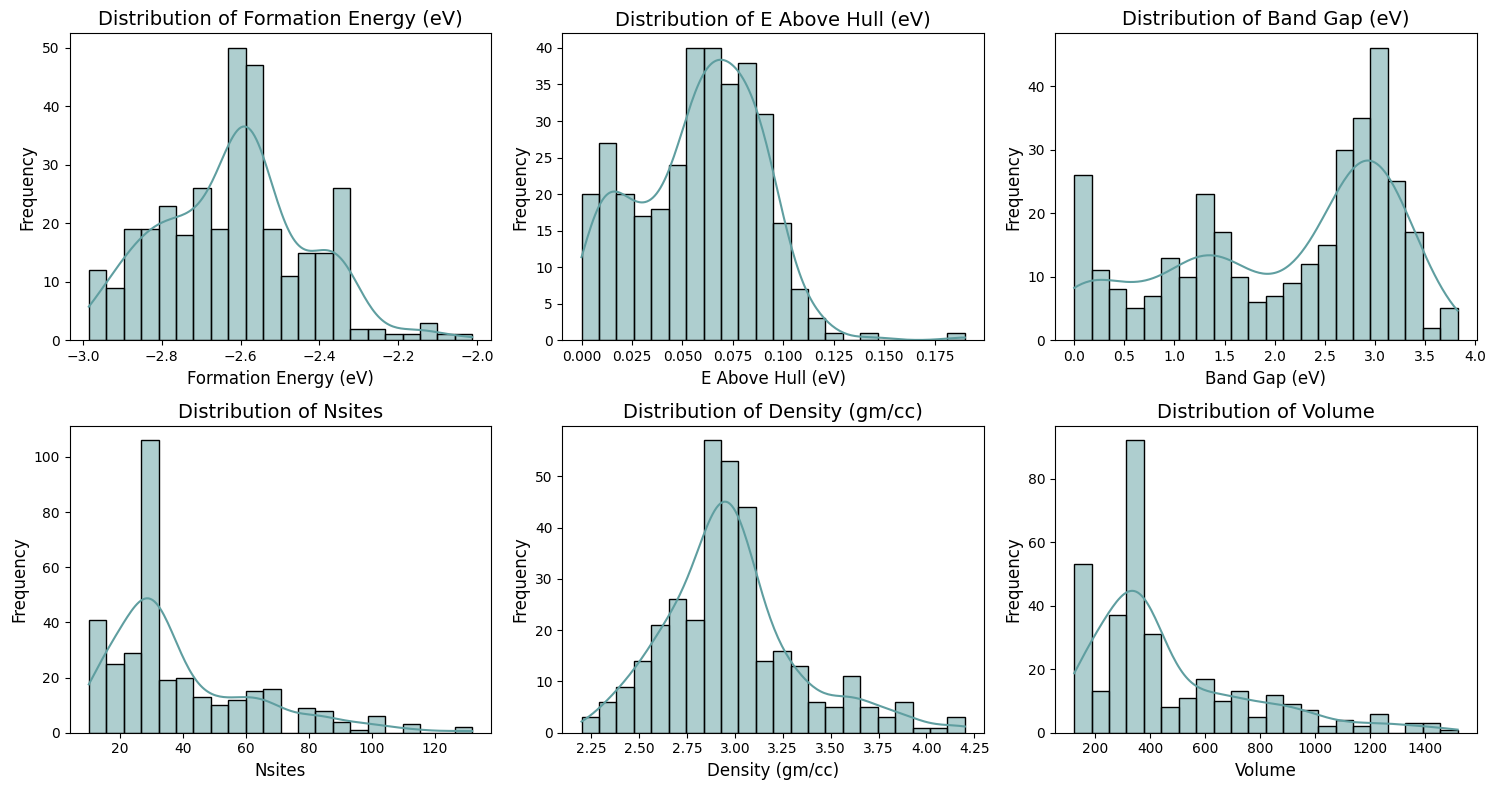

In [14]:
# Histograms for numerical columns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  

for i, col in enumerate(numerical_cols):
    if i < len(axes):  # Ensure we don't exceed the number of axes
        sns.histplot(df[col], bins=22, kde=True, color="cadetblue", edgecolor="black", ax=axes[i])
        axes[i].set_xlabel(col, fontsize=12)
        axes[i].set_ylabel("Frequency", fontsize=12)
        axes[i].set_title(f"Distribution of {col}", fontsize=14)

# Remove any unused axes
if len(axes) > len(numerical_cols):
    for j in range(len(numerical_cols), len(axes)):
        axes[j].remove()

plt.tight_layout()
plt.show()

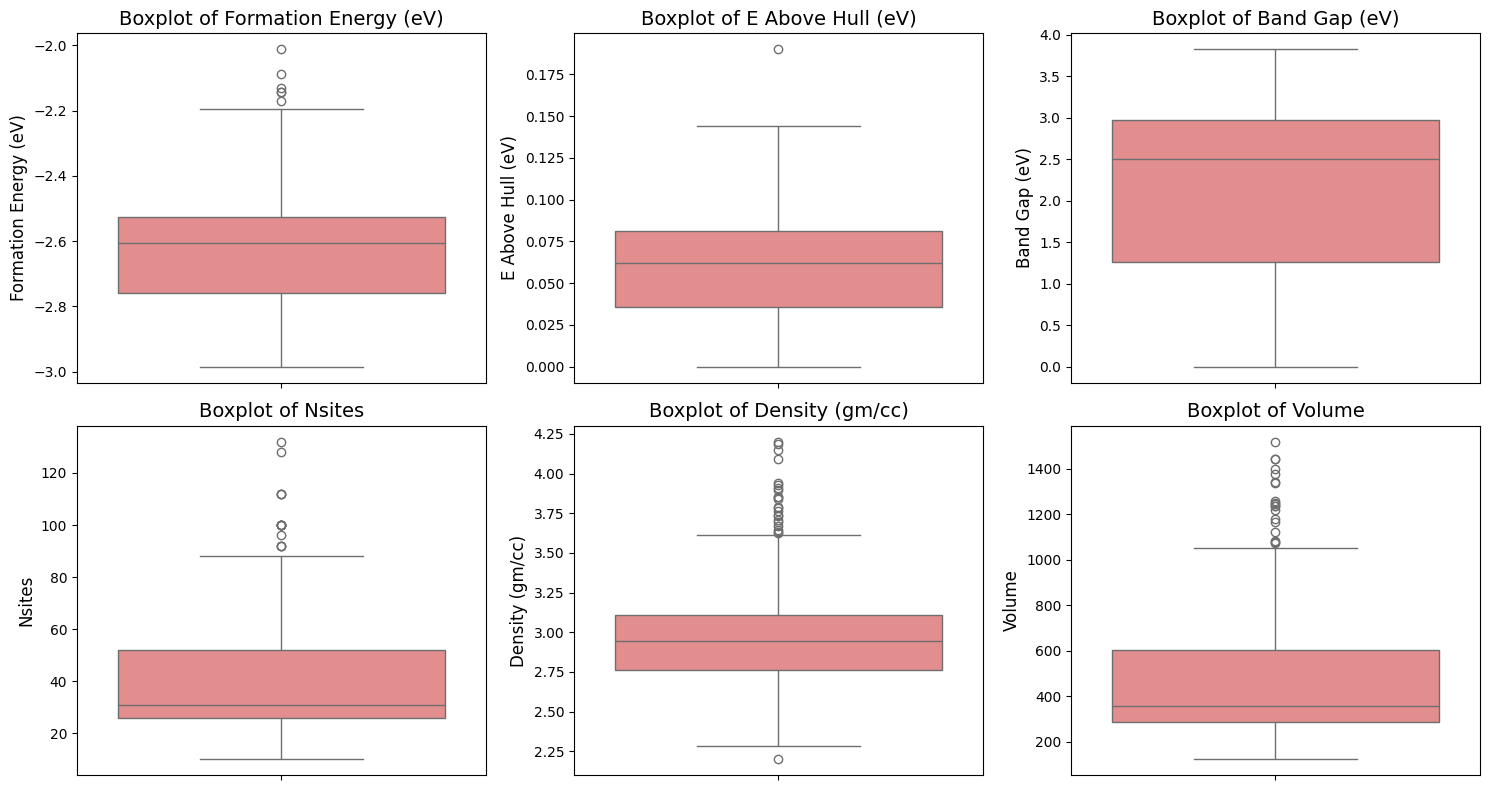

In [15]:
# Plotting each numerical column as a boxplot

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numerical_cols)
rows = int(np.ceil(num_cols / 3))  
cols = min(3, num_cols)  
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten() 

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], color="lightcoral", ax=axes[i])
    axes[i].set_ylabel(col, fontsize=12)
    axes[i].set_title(f"Boxplot of {col}", fontsize=14)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

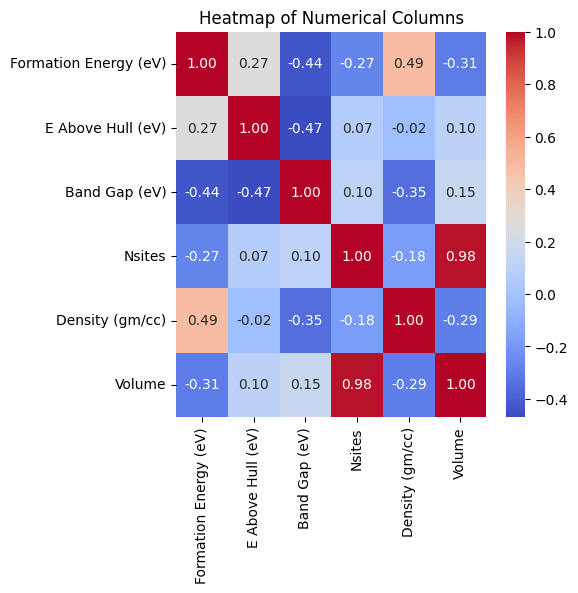

In [16]:
# Heatmap for numerical columns

numerical_columns = df.select_dtypes(include=['number'])

plt.figure(figsize=(5, 5))
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Numerical Columns')
plt.show()

## Data Preprocessing

In [17]:
# Label encoding

from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for col in df.columns:
    df[col] = encoder.fit_transform(df[col].values)

In [18]:
X = df.drop(columns=['Crystal System'])
y = df['Crystal System']

In [19]:
# Train test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Evaluation

In [20]:
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
logistic_clf = LogisticRegression()
ridge_clf = RidgeClassifier()
xgboost_clf = XGBClassifier()
random_forest_clf = RandomForestClassifier()
ada_boost_clf = AdaBoostClassifier()
grad_boost_clf = GradientBoostingClassifier()
bagging_clf = BaggingClassifier()
decision_tree_clf = DecisionTreeClassifier()
svm_clf = SVC()

In [22]:
model_li = [logistic_clf, ridge_clf, xgboost_clf, random_forest_clf, 
            ada_boost_clf, grad_boost_clf, bagging_clf, decision_tree_clf, svm_clf]

scores = []
for model in model_li:
    model.fit(X_train, y_train)
    scores.append(accuracy_score(y_test, model.predict(X_test)))

print(scores)

[0.38235294117647056, 0.38235294117647056, 0.9852941176470589, 0.9411764705882353, 0.9558823529411765, 0.9852941176470589, 0.9558823529411765, 0.9852941176470589, 0.4264705882352941]


## Model Evaluation

Model: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.45      0.44        31
           1       0.30      0.47      0.37        19
           2       0.60      0.17      0.26        18

    accuracy                           0.38        68
   macro avg       0.44      0.36      0.36        68
weighted avg       0.44      0.38      0.37        68

Confusion Matrix:
 [[14 16  1]
 [ 9  9  1]
 [10  5  3]]


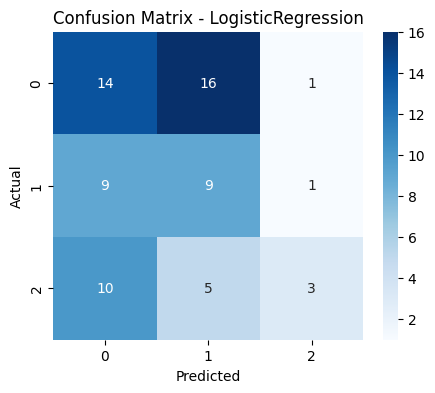

Model: RidgeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.48      0.45        31
           1       0.30      0.47      0.37        19
           2       1.00      0.11      0.20        18

    accuracy                           0.38        68
   macro avg       0.57      0.36      0.34        68
weighted avg       0.54      0.38      0.36        68

Confusion Matrix:
 [[15 16  0]
 [10  9  0]
 [11  5  2]]


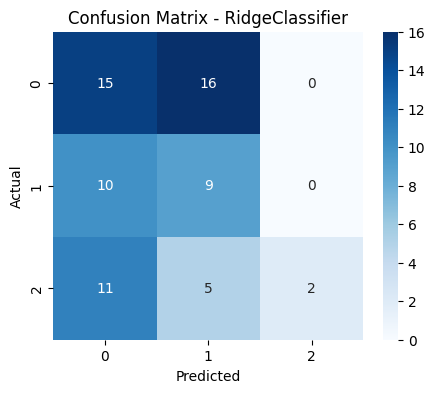

Model: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        18

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68

Confusion Matrix:
 [[31  0  0]
 [ 1 18  0]
 [ 0  0 18]]


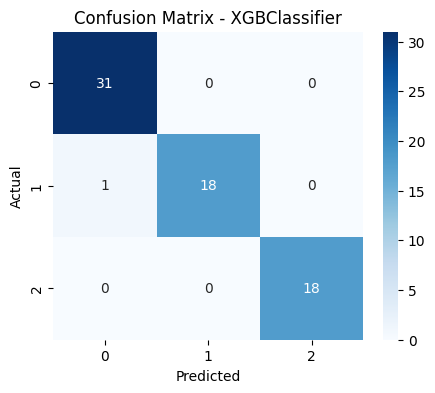

Model: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.90      0.95      0.92        19
           2       1.00      1.00      1.00        18

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68

Confusion Matrix:
 [[29  2  0]
 [ 1 18  0]
 [ 0  0 18]]


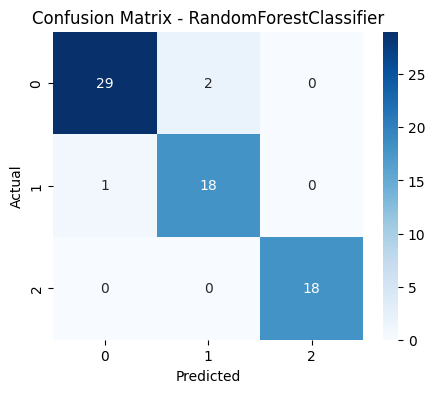

Model: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.95        31
           1       0.90      0.95      0.92        19
           2       1.00      1.00      1.00        18

    accuracy                           0.96        68
   macro avg       0.96      0.96      0.96        68
weighted avg       0.96      0.96      0.96        68

Confusion Matrix:
 [[29  2  0]
 [ 1 18  0]
 [ 0  0 18]]


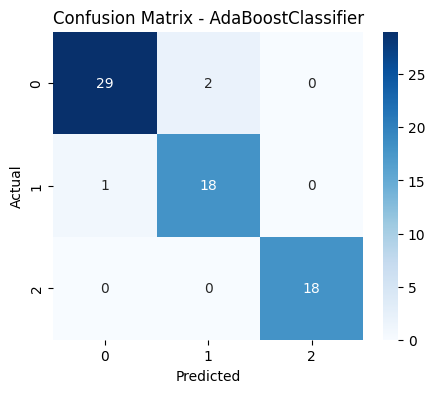

Model: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        18

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68

Confusion Matrix:
 [[31  0  0]
 [ 1 18  0]
 [ 0  0 18]]


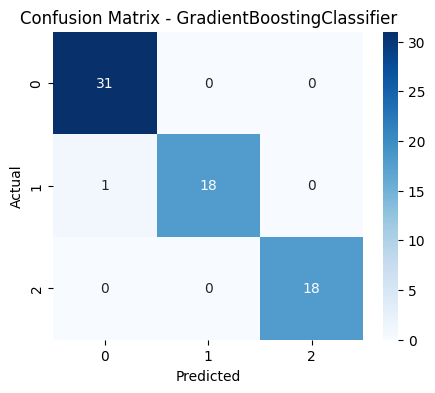

Model: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        18

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68

Confusion Matrix:
 [[31  0  0]
 [ 1 18  0]
 [ 0  0 18]]


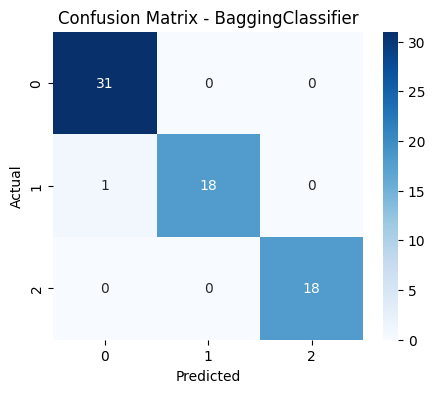

Model: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        31
           1       1.00      0.95      0.97        19
           2       1.00      1.00      1.00        18

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68

Confusion Matrix:
 [[31  0  0]
 [ 1 18  0]
 [ 0  0 18]]


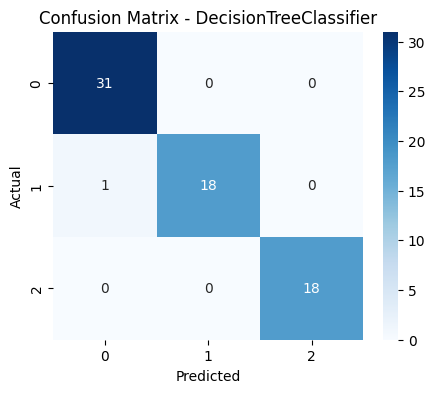

Model: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.45      0.44        31
           1       0.40      0.74      0.52        19
           2       1.00      0.06      0.11        18

    accuracy                           0.43        68
   macro avg       0.61      0.41      0.36        68
weighted avg       0.58      0.43      0.38        68

Confusion Matrix:
 [[14 17  0]
 [ 5 14  0]
 [13  4  1]]


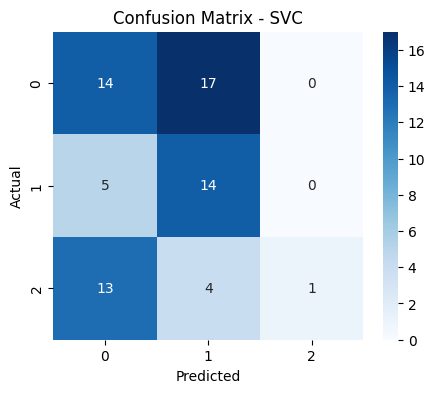

In [23]:
for model in model_li:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model.__class__.__name__}")
    plt.show()